# Model Training

### 1.1) importing Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/stud.csv")

### Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [4]:
X = df.drop("math_score",axis=1)
y = df["math_score"]

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### Create Column Transformer

In [7]:
numerical_features = X.dtypes[X.dtypes != "object"].index
categorical_features = X.dtypes[X.dtypes == "object"].index

In [8]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ("OneHotEncoder",categorical_transformer,categorical_features),
    ("StandardScaler",numeric_transformer,numerical_features)
]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

### Train, Test and Split

In [11]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create Evaluate Function to give all metrics after model training

In [13]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mse,mae,rmse,r2_square

In [15]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGB":XGBRegressor(),
    "Catboost":CatBoostRegressor(),
    "Adaboost":AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    # Train model
    model.fit(X_train,y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate train and test dataset
    model_train_mse,model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance pf Training set")
    print("RMSE:",model_train_rmse)
    print("MSE:",model_train_mse)
    print("MAE:",model_train_mae)
    print("R2:",model_train_r2)
    
    print("-"*50)
    
    print("Model Performance pf Testing set")
    print("RMSE:",model_test_rmse)
    print("MSE:",model_test_mse)
    print("MAE:",model_test_mae)
    print("R2:",model_test_r2)
    r2_list.append(model_test_r2)
    
    print("-"*50)

Linear Regression
Model Performance pf Training set
RMSE: 5.326473121866734
MSE: 28.37131591796875
MAE: 4.2716796875
R2: 0.8741555453590907
--------------------------------------------------
Model Performance pf Testing set
RMSE: 5.388450535165176
MSE: 29.035399169921874
MAE: 4.204609375
R2: 0.8806789262610345
--------------------------------------------------
Lasso
Model Performance pf Training set
RMSE: 6.593815587795566
MSE: 43.47840400585579
MAE: 5.206302661246526
R2: 0.8071462015863456
--------------------------------------------------
Model Performance pf Testing set
RMSE: 6.519694535667419
MSE: 42.5064168384116
MAE: 5.157881810347763
R2: 0.8253197323627853
--------------------------------------------------
Ridge
Model Performance pf Training set
RMSE: 5.323324922741654
MSE: 28.33778823308244
MAE: 4.264987823725982
R2: 0.8743042615212909
--------------------------------------------------
Model Performance pf Testing set
RMSE: 5.390387016935642
MSE: 29.056272192348324
MAE: 4.21110

217:	learn: 4.7234834	total: 416ms	remaining: 1.49s
218:	learn: 4.7209542	total: 417ms	remaining: 1.49s
219:	learn: 4.7161734	total: 419ms	remaining: 1.49s
220:	learn: 4.7105640	total: 421ms	remaining: 1.48s
221:	learn: 4.7071603	total: 423ms	remaining: 1.48s
222:	learn: 4.7040835	total: 425ms	remaining: 1.48s
223:	learn: 4.7025018	total: 427ms	remaining: 1.48s
224:	learn: 4.7002697	total: 429ms	remaining: 1.48s
225:	learn: 4.6953463	total: 431ms	remaining: 1.48s
226:	learn: 4.6897693	total: 433ms	remaining: 1.48s
227:	learn: 4.6879195	total: 435ms	remaining: 1.47s
228:	learn: 4.6829821	total: 437ms	remaining: 1.47s
229:	learn: 4.6795787	total: 439ms	remaining: 1.47s
230:	learn: 4.6757514	total: 441ms	remaining: 1.47s
231:	learn: 4.6727107	total: 444ms	remaining: 1.47s
232:	learn: 4.6690533	total: 446ms	remaining: 1.47s
233:	learn: 4.6675957	total: 447ms	remaining: 1.46s
234:	learn: 4.6642413	total: 449ms	remaining: 1.46s
235:	learn: 4.6622470	total: 450ms	remaining: 1.46s
236:	learn: 

409:	learn: 4.1416910	total: 677ms	remaining: 975ms
410:	learn: 4.1388935	total: 679ms	remaining: 973ms
411:	learn: 4.1369646	total: 680ms	remaining: 970ms
412:	learn: 4.1337735	total: 681ms	remaining: 968ms
413:	learn: 4.1313634	total: 682ms	remaining: 965ms
414:	learn: 4.1302286	total: 683ms	remaining: 963ms
415:	learn: 4.1288419	total: 684ms	remaining: 961ms
416:	learn: 4.1241349	total: 686ms	remaining: 959ms
417:	learn: 4.1194225	total: 688ms	remaining: 957ms
418:	learn: 4.1170382	total: 689ms	remaining: 955ms
419:	learn: 4.1160676	total: 690ms	remaining: 953ms
420:	learn: 4.1103435	total: 692ms	remaining: 951ms
421:	learn: 4.1056045	total: 693ms	remaining: 949ms
422:	learn: 4.1033901	total: 694ms	remaining: 947ms
423:	learn: 4.0967244	total: 695ms	remaining: 945ms
424:	learn: 4.0934313	total: 697ms	remaining: 943ms
425:	learn: 4.0914127	total: 699ms	remaining: 941ms
426:	learn: 4.0911929	total: 700ms	remaining: 939ms
427:	learn: 4.0889946	total: 701ms	remaining: 937ms
428:	learn: 

630:	learn: 3.6621184	total: 943ms	remaining: 552ms
631:	learn: 3.6608714	total: 945ms	remaining: 550ms
632:	learn: 3.6566952	total: 946ms	remaining: 548ms
633:	learn: 3.6544978	total: 948ms	remaining: 547ms
634:	learn: 3.6541891	total: 949ms	remaining: 545ms
635:	learn: 3.6539577	total: 950ms	remaining: 544ms
636:	learn: 3.6519207	total: 951ms	remaining: 542ms
637:	learn: 3.6510670	total: 952ms	remaining: 540ms
638:	learn: 3.6506128	total: 954ms	remaining: 539ms
639:	learn: 3.6498847	total: 955ms	remaining: 537ms
640:	learn: 3.6462762	total: 956ms	remaining: 536ms
641:	learn: 3.6458082	total: 957ms	remaining: 534ms
642:	learn: 3.6450430	total: 959ms	remaining: 532ms
643:	learn: 3.6398645	total: 960ms	remaining: 531ms
644:	learn: 3.6373185	total: 962ms	remaining: 529ms
645:	learn: 3.6363449	total: 963ms	remaining: 528ms
646:	learn: 3.6347546	total: 964ms	remaining: 526ms
647:	learn: 3.6307250	total: 965ms	remaining: 524ms
648:	learn: 3.6294083	total: 967ms	remaining: 523ms
649:	learn: 

843:	learn: 3.2749963	total: 1.21s	remaining: 224ms
844:	learn: 3.2735700	total: 1.21s	remaining: 222ms
845:	learn: 3.2696656	total: 1.21s	remaining: 221ms
846:	learn: 3.2679847	total: 1.21s	remaining: 219ms
847:	learn: 3.2677025	total: 1.22s	remaining: 218ms
848:	learn: 3.2666719	total: 1.22s	remaining: 216ms
849:	learn: 3.2653598	total: 1.22s	remaining: 215ms
850:	learn: 3.2618983	total: 1.22s	remaining: 214ms
851:	learn: 3.2604563	total: 1.22s	remaining: 212ms
852:	learn: 3.2583891	total: 1.22s	remaining: 211ms
853:	learn: 3.2581085	total: 1.22s	remaining: 209ms
854:	learn: 3.2564249	total: 1.22s	remaining: 208ms
855:	learn: 3.2548180	total: 1.23s	remaining: 206ms
856:	learn: 3.2538984	total: 1.23s	remaining: 205ms
857:	learn: 3.2530237	total: 1.23s	remaining: 203ms
858:	learn: 3.2528455	total: 1.23s	remaining: 202ms
859:	learn: 3.2523160	total: 1.23s	remaining: 200ms
860:	learn: 3.2497530	total: 1.23s	remaining: 199ms
861:	learn: 3.2491511	total: 1.23s	remaining: 197ms
862:	learn: 

Catboost
Model Performance pf Training set
RMSE: 3.042664195326799
MSE: 9.257805405523678
MAE: 2.405393926779502
R2: 0.9589358676277713
--------------------------------------------------
Model Performance pf Testing set
RMSE: 6.008631956907363
MSE: 36.10365799356841
MAE: 4.612531714976557
R2: 0.8516318920747058
--------------------------------------------------
Adaboost
Model Performance pf Training set
RMSE: 5.8476081559564195
MSE: 34.194521145608036
MAE: 4.775396912115062
R2: 0.8483260037102935
--------------------------------------------------
Model Performance pf Testing set
RMSE: 6.0797520618906145
MSE: 36.96338513406318
MAE: 4.728284686194043
R2: 0.8480988404047073
--------------------------------------------------


### Result

In [19]:
pd.DataFrame({"model name":model_list,"r2 score":r2_list}).sort_values(by="r2 score",ascending=False)

,model name,r2 score
0,Linear Regression,0.880679
2,Ridge,0.880593
7,Catboost,0.851632
5,Random Forest,0.849645
8,Adaboost,0.848099
1,Lasso,0.825320
6,XGB,0.821589
3,KNN,0.783193
4,Decision Tree,0.742499


### Linear Regression

In [20]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

score = r2_score(y_test,y_pred) * 100
print("Accuracy:",score)

Accuracy: 88.06789262610344


### Plot y_pred and y_test

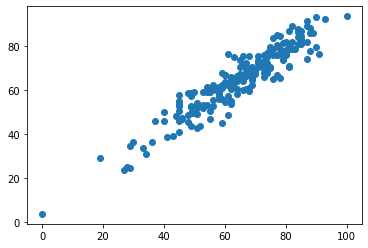

In [22]:
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='math_score'>

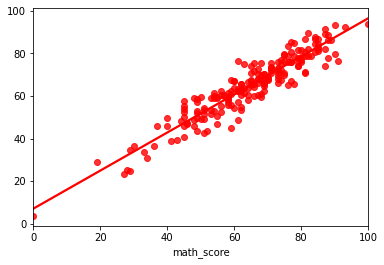

In [23]:
sns.regplot(y_test,y_pred,ci=None,color="red")

### Difference between actual and predicted

In [24]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Difference":y_test-y_pred})

,Actual,Predicted,Difference
521,91,76.421875,14.578125
737,53,59.000000,-6.000000
740,80,76.953125,3.046875
660,74,76.953125,-2.953125
411,84,87.812500,-3.812500
...,...,...,...
408,52,43.531250,8.468750
332,62,62.218750,-0.218750
208,74,67.734375,6.265625
613,65,67.046875,-2.046875
